## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  71.353060  1174.005391  0.224804  2.949194  1.315779
1  94.632277   577.186482  0.849768  6.560490  1.523592
2  86.812701   153.272200  0.141415  2.298465  0.182740
3  85.937171  1414.270717  0.962093  4.102831  1.758239
4  67.127141   751.438631  0.189290  7.932634  1.069485


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9453872	total: 62.2ms	remaining: 1m 2s
1:	learn: 0.9378585	total: 63.1ms	remaining: 31.5s
2:	learn: 0.9285167	total: 63.5ms	remaining: 21.1s
3:	learn: 0.9206375	total: 64.4ms	remaining: 16s
4:	learn: 0.9106783	total: 65.1ms	remaining: 13s
5:	learn: 0.9037062	total: 66ms	remaining: 10.9s
6:	learn: 0.8916150	total: 66.6ms	remaining: 9.45s
7:	learn: 0.8817928	total: 67.3ms	remaining: 8.35s
8:	learn: 0.8745551	total: 67.8ms	remaining: 7.46s
9:	learn: 0.8645669	total: 68.5ms	remaining: 6.78s
10:	learn: 0.8566461	total: 69ms	remaining: 6.21s
11:	learn: 0.8470209	total: 69.5ms	remaining: 5.72s
12:	learn: 0.8392857	total: 70.5ms	remaining: 5.35s
13:	learn: 0.8321121	total: 71ms	remaining: 5s
14:	learn: 0.8239710	total: 71.8ms	remaining: 4.71s
15:	learn: 0.8161665	total: 72.6ms	remaining: 4.47s
16:	learn: 0.8073890	total: 73.1ms	remaining: 4.23s
17:	learn: 0.8001324	total: 73.9ms	remaining: 4.03s
18:	learn: 0.7935776	total: 74.5ms	remaining: 3.84s
19:	learn: 0.7859041	total: 75.5ms	

207:	learn: 0.2354186	total: 168ms	remaining: 638ms
208:	learn: 0.2342933	total: 168ms	remaining: 637ms
209:	learn: 0.2334237	total: 169ms	remaining: 634ms
210:	learn: 0.2324488	total: 169ms	remaining: 633ms
211:	learn: 0.2315146	total: 170ms	remaining: 630ms
212:	learn: 0.2309328	total: 170ms	remaining: 628ms
213:	learn: 0.2293417	total: 170ms	remaining: 626ms
214:	learn: 0.2282276	total: 171ms	remaining: 623ms
215:	learn: 0.2269866	total: 171ms	remaining: 621ms
216:	learn: 0.2258903	total: 171ms	remaining: 618ms
217:	learn: 0.2249987	total: 172ms	remaining: 616ms
218:	learn: 0.2238607	total: 172ms	remaining: 614ms
219:	learn: 0.2227628	total: 173ms	remaining: 612ms
220:	learn: 0.2217290	total: 173ms	remaining: 610ms
221:	learn: 0.2203121	total: 175ms	remaining: 615ms
222:	learn: 0.2191318	total: 177ms	remaining: 616ms
223:	learn: 0.2178543	total: 177ms	remaining: 614ms
224:	learn: 0.2169674	total: 177ms	remaining: 611ms
225:	learn: 0.2158446	total: 178ms	remaining: 609ms
226:	learn: 

333:	learn: 0.1349982	total: 226ms	remaining: 451ms
334:	learn: 0.1344430	total: 227ms	remaining: 450ms
335:	learn: 0.1338566	total: 228ms	remaining: 450ms
336:	learn: 0.1331931	total: 228ms	remaining: 449ms
337:	learn: 0.1326905	total: 229ms	remaining: 448ms
338:	learn: 0.1321195	total: 229ms	remaining: 446ms
339:	learn: 0.1315864	total: 229ms	remaining: 445ms
340:	learn: 0.1310639	total: 230ms	remaining: 444ms
341:	learn: 0.1304525	total: 230ms	remaining: 443ms
342:	learn: 0.1299351	total: 231ms	remaining: 442ms
343:	learn: 0.1294263	total: 231ms	remaining: 441ms
344:	learn: 0.1289239	total: 232ms	remaining: 440ms
345:	learn: 0.1284296	total: 232ms	remaining: 438ms
346:	learn: 0.1279315	total: 232ms	remaining: 437ms
347:	learn: 0.1273471	total: 233ms	remaining: 436ms
348:	learn: 0.1269478	total: 233ms	remaining: 435ms
349:	learn: 0.1264511	total: 234ms	remaining: 434ms
350:	learn: 0.1258353	total: 234ms	remaining: 433ms
351:	learn: 0.1253909	total: 234ms	remaining: 431ms
352:	learn: 

533:	learn: 0.0678714	total: 329ms	remaining: 287ms
534:	learn: 0.0677973	total: 330ms	remaining: 287ms
535:	learn: 0.0675835	total: 331ms	remaining: 286ms
536:	learn: 0.0672476	total: 331ms	remaining: 286ms
537:	learn: 0.0670261	total: 332ms	remaining: 285ms
538:	learn: 0.0668186	total: 332ms	remaining: 284ms
539:	learn: 0.0665256	total: 333ms	remaining: 283ms
540:	learn: 0.0663326	total: 333ms	remaining: 283ms
541:	learn: 0.0661281	total: 334ms	remaining: 282ms
542:	learn: 0.0659424	total: 335ms	remaining: 282ms
543:	learn: 0.0657780	total: 336ms	remaining: 282ms
544:	learn: 0.0655909	total: 336ms	remaining: 281ms
545:	learn: 0.0654722	total: 337ms	remaining: 280ms
546:	learn: 0.0651915	total: 338ms	remaining: 280ms
547:	learn: 0.0650113	total: 338ms	remaining: 279ms
548:	learn: 0.0648519	total: 339ms	remaining: 278ms
549:	learn: 0.0646572	total: 339ms	remaining: 277ms
550:	learn: 0.0644435	total: 340ms	remaining: 277ms
551:	learn: 0.0643530	total: 340ms	remaining: 276ms
552:	learn: 

654:	learn: 0.0512276	total: 387ms	remaining: 204ms
655:	learn: 0.0511950	total: 388ms	remaining: 204ms
656:	learn: 0.0511629	total: 389ms	remaining: 203ms
657:	learn: 0.0510398	total: 389ms	remaining: 202ms
658:	learn: 0.0508417	total: 390ms	remaining: 202ms
659:	learn: 0.0507221	total: 390ms	remaining: 201ms
660:	learn: 0.0505703	total: 391ms	remaining: 200ms
661:	learn: 0.0505209	total: 391ms	remaining: 200ms
662:	learn: 0.0503297	total: 392ms	remaining: 199ms
663:	learn: 0.0502648	total: 392ms	remaining: 198ms
664:	learn: 0.0502340	total: 393ms	remaining: 198ms
665:	learn: 0.0502037	total: 393ms	remaining: 197ms
666:	learn: 0.0500667	total: 393ms	remaining: 196ms
667:	learn: 0.0500004	total: 394ms	remaining: 196ms
668:	learn: 0.0498145	total: 394ms	remaining: 195ms
669:	learn: 0.0497629	total: 395ms	remaining: 194ms
670:	learn: 0.0496479	total: 395ms	remaining: 194ms
671:	learn: 0.0494678	total: 396ms	remaining: 193ms
672:	learn: 0.0494021	total: 396ms	remaining: 192ms
673:	learn: 

879:	learn: 0.0266240	total: 490ms	remaining: 66.8ms
880:	learn: 0.0265989	total: 491ms	remaining: 66.3ms
881:	learn: 0.0265249	total: 491ms	remaining: 65.7ms
882:	learn: 0.0265000	total: 492ms	remaining: 65.2ms
883:	learn: 0.0264378	total: 492ms	remaining: 64.6ms
884:	learn: 0.0263357	total: 493ms	remaining: 64ms
885:	learn: 0.0262592	total: 493ms	remaining: 63.4ms
886:	learn: 0.0261358	total: 493ms	remaining: 62.9ms
887:	learn: 0.0260316	total: 494ms	remaining: 62.3ms
888:	learn: 0.0260060	total: 495ms	remaining: 61.8ms
889:	learn: 0.0259083	total: 496ms	remaining: 61.3ms
890:	learn: 0.0258829	total: 496ms	remaining: 60.7ms
891:	learn: 0.0258580	total: 497ms	remaining: 60.1ms
892:	learn: 0.0257574	total: 497ms	remaining: 59.5ms
893:	learn: 0.0257327	total: 497ms	remaining: 59ms
894:	learn: 0.0257084	total: 498ms	remaining: 58.4ms
895:	learn: 0.0256102	total: 498ms	remaining: 57.8ms
896:	learn: 0.0255861	total: 499ms	remaining: 57.3ms
897:	learn: 0.0255545	total: 499ms	remaining: 56.7

991:	learn: 0.0204841	total: 547ms	remaining: 4.41ms
992:	learn: 0.0204116	total: 548ms	remaining: 3.86ms
993:	learn: 0.0203440	total: 549ms	remaining: 3.31ms
994:	learn: 0.0203259	total: 549ms	remaining: 2.76ms
995:	learn: 0.0202560	total: 550ms	remaining: 2.21ms
996:	learn: 0.0202385	total: 550ms	remaining: 1.66ms
997:	learn: 0.0202214	total: 550ms	remaining: 1.1ms
998:	learn: 0.0201518	total: 551ms	remaining: 551us
999:	learn: 0.0201349	total: 551ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.552943455224027


ABC Pre-generator MAE 0.5654060478804376


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

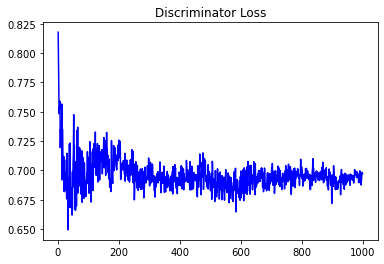

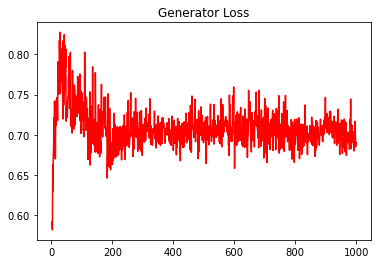

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.7028129022568465


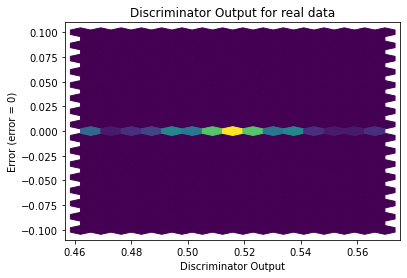

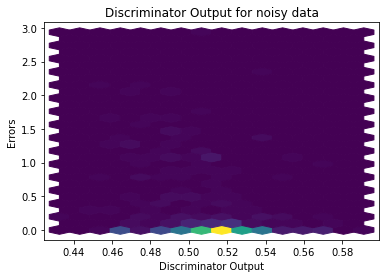

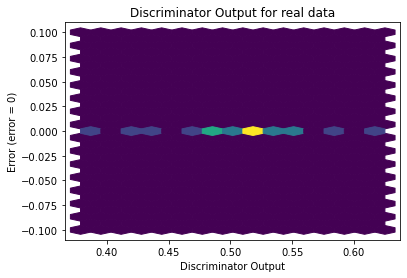

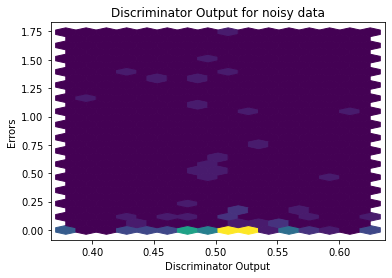

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

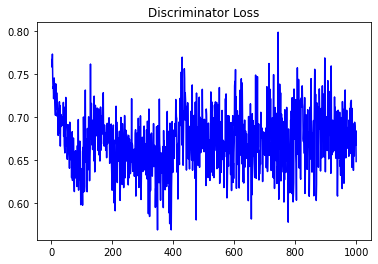

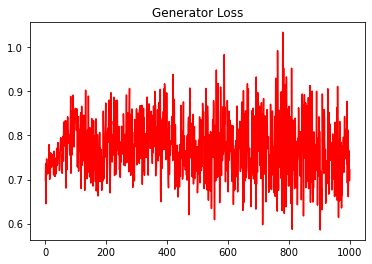

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.1998624362051487


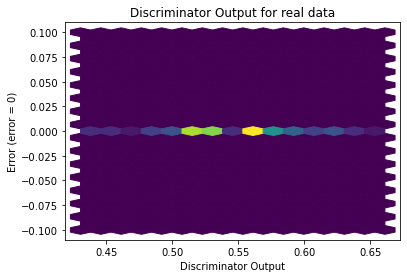

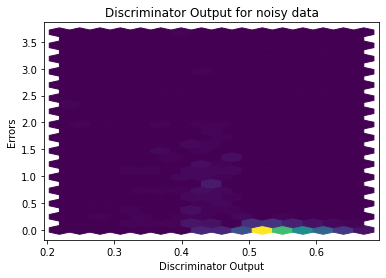

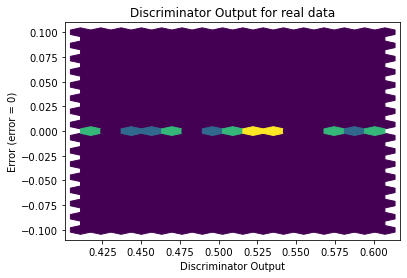

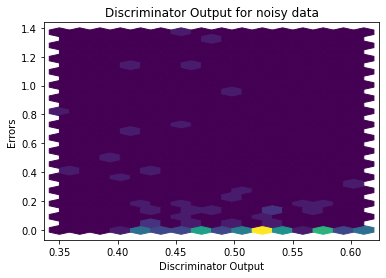

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


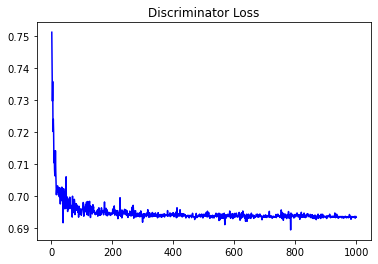

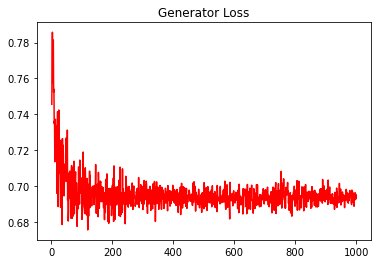

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.6183403760194779


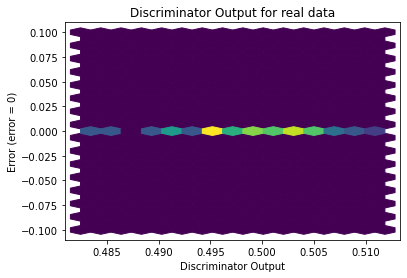

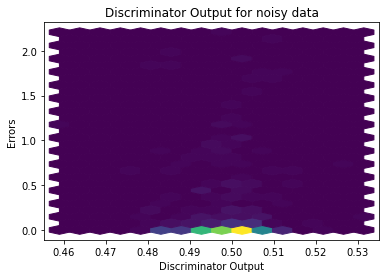

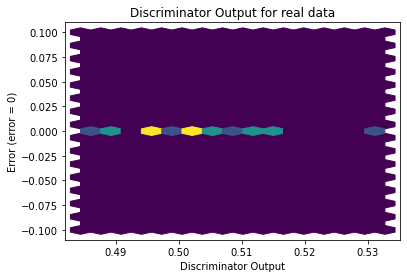

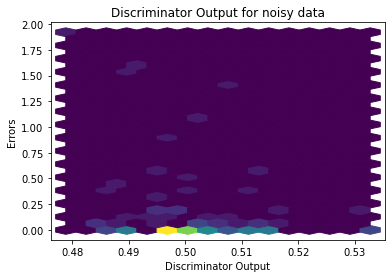

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


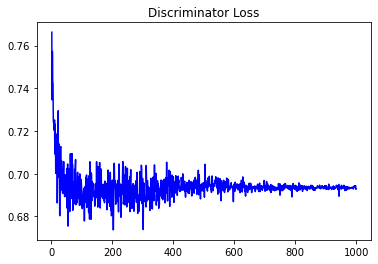

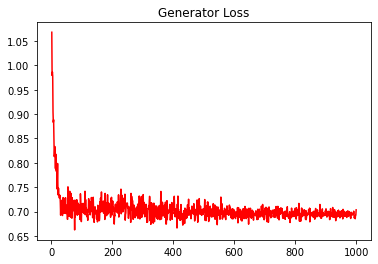

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5692682279273867


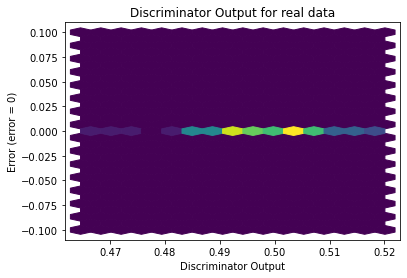

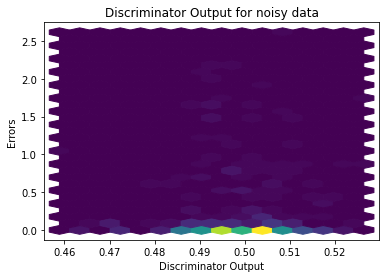

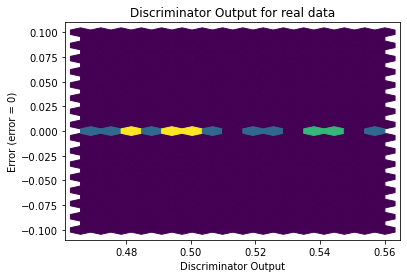

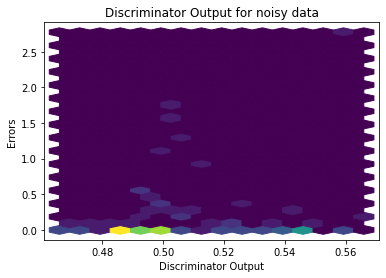

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6881]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0576]], requires_grad=True)
